In [21]:
#Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#1. Read in pronto bike data from .csv file
pronto_df = pd.read_csv('../data/pronto.csv')

In [10]:
#2. Add columns to dataframe
#Rename cols without spaces
pronto_df = pronto_df.rename(
    {'Date':'date', 'Fremont Bridge East Sidewalk':'east', 'Fremont Bridge West Sidewalk':'west'}, 
    axis='columns')

#Add a totals column that sums bike count from East+West
pronto_df['total'] = pronto_df['east'] + pronto_df['west']

#Convert 'date' to datetime object, add column for time of day and for year
pronto_df['date'] = pd.to_datetime(pronto_df['date'])
pronto_df['year'] = pronto_df['date'].dt.year
pronto_df['time'] = pronto_df['date'].dt.time

In [11]:
#3. Create dataframe with subset of data from 2016

pronto_2016 = pronto_df[pronto_df['year']==2016].copy()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

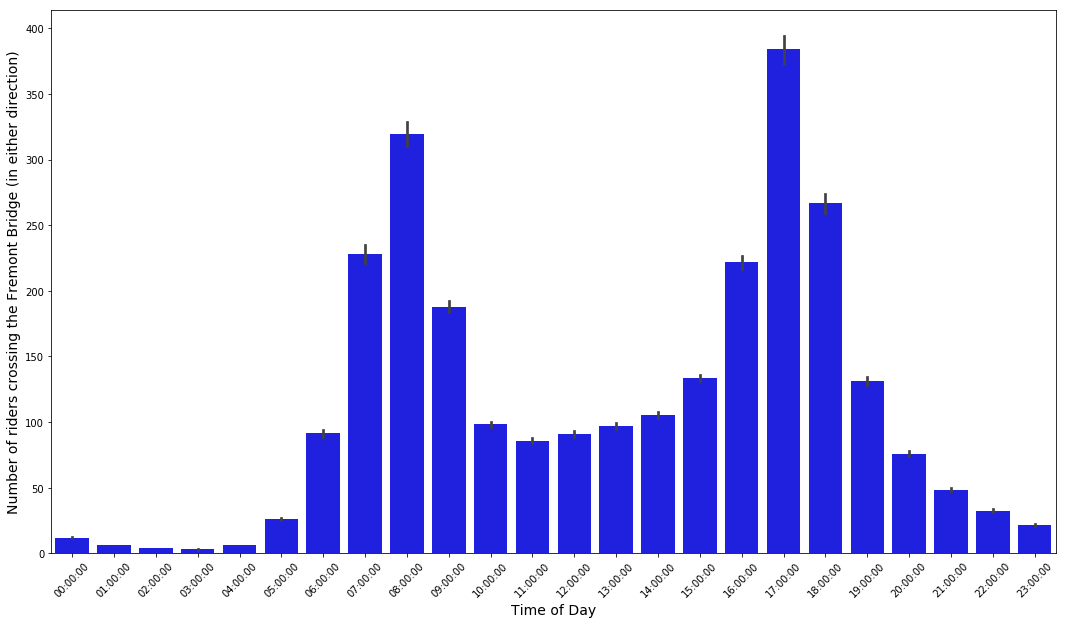

In [32]:
#4. Plot counts by hour of day

fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x='time',y='total', data=pronto_df, color='blue', ax=ax)
ax.set_ylabel('Number of riders crossing the Fremont Bridge (in either direction)',fontsize=14)
ax.set_xlabel('Time of Day',fontsize=14)
plt.xticks(rotation=45)

In [19]:
#5. Use pandas to determine the busiest hour of the day
pronto_df.groupby('time')['total'].mean().sort_values(ascending=False)

time
17:00:00    383.922796
08:00:00    319.510735
18:00:00    266.588397
07:00:00    228.306989
16:00:00    221.652810
09:00:00    187.813071
15:00:00    133.784376
19:00:00    131.428506
14:00:00    105.571494
10:00:00     98.311700
13:00:00     97.198264
06:00:00     91.533120
12:00:00     90.942870
11:00:00     85.872486
20:00:00     75.988579
21:00:00     48.672910
22:00:00     32.451804
05:00:00     26.142074
23:00:00     21.561444
00:00:00     12.071722
04:00:00      6.534947
01:00:00      6.331201
02:00:00      4.230311
03:00:00      3.046140
Name: total, dtype: float64